# Importing Libraries

In [80]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.corpus import words
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
!pip install striprtf
words = set(nltk.corpus.words.words())
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


## Reading Data 

In [2]:
data = pd.read_csv('spam.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
len(data)

5572

In [4]:
p_spam = len(data[data['Category']=='spam'])/len(data)
p_spam

0.13406317300789664

Percentage of spam emails is around 13.5%

In [5]:
X = data['Message']
y = data['Category']

# Preprocessing Data

Helper functions to remove hyperlinks , punctutations and to convert every character to lower case

In [6]:
def remove_hyperlink(word):
    return  re.sub(r"http\S+", " ", word)

def to_lower(word):
    result = word.lower()
    return result

def remove_number(word):
    result = re.sub(r'\d+', '', word)
    return result

def remove_punctuation(word):
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))
    return result



def replace_newline(word):
    word = word.replace('\r',' ')
    return word.replace('\n',' ')



def clean_up_pipeline(sentence):
    cleaning_utils = [remove_hyperlink,
                      replace_newline,
                      to_lower,
                      remove_number,
                      remove_punctuation]
    for o in cleaning_utils:
        sentence = o(sentence)
    return sentence


In [7]:
def Bag_of_words_fit(X):
  for i in range(len(X)):
      #print(i)

      X[i] = clean_up_pipeline(X[i])
  vocabulary={}
  for i in range(len(X)):
    for word in X[i].split():
      if word not in stop_words and word in words and len(word)>1:
        if word in vocabulary:
          vocabulary[word][i]=1
        else:
          vocabulary[word]=np.zeros(len(X))
          vocabulary[word][i]=1
  
  return vocabulary
      
  

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
vocabulary  = Bag_of_words_fit(X_train.values)

#Feature extraction from raw text

In [9]:
def bag_of_words_transform(X,vocabulary):
  ratio_unique_words = []
  for i in range(len(X)):
    X[i] = clean_up_pipeline(X[i])
    unique_words=len(set(X[i].split()))
    try:
      ratio_unique_words.append(unique_words/len(X[i].split()))
    except:
      ratio_unique_words.append(0)
  
  vocabulary = {word:np.zeros(len(X)) for word in vocabulary}
  ratio_stop_words = np.zeros(len(X))
  ratio_non_dict_words = np.zeros(len(X))
  for i in range(len(X)):
    for word in set(X[i].split()):
      if word in stop_words:
        ratio_stop_words[i]+=1
      if word not in words:
        ratio_non_dict_words[i]+=1
      if word not in stop_words and word in words and len(word)>1:
        if word in vocabulary:
          vocabulary[word][i]=1
      try:
        ratio_stop_words[i] = ratio_stop_words[i]/len(X[i].split())
        ratio_non_dict_words[i] = ratio_non_dict_words[i]/len(X[i].split())
      except:
        ratio_stop_words[i] = 0
        ratio_non_dict_words[i] = 0
  #print(len(vocabulary['sent']))
  X_features  = pd.DataFrame(vocabulary)
  X_features['ratio_unique_words'] = ratio_unique_words
  X_features['ratio_stop_words'] = ratio_stop_words
  X_features['ratio_non_dict_words'] = ratio_non_dict_words
  return X_features


Extracting Vocabulary of words from training datasets and using that vocabulary to transform training and 
test datasets

In [10]:
X_train_features = bag_of_words_transform(X_train.values,vocabulary)
X_test_features = bag_of_words_transform(X_test.values,vocabulary)

**Features Extracted**

1.   Vocabulary or Bag of words : Whether a word occurs or not in  an email (after removing stop words and gibberish words in preprocessing)
2.   ratio_unique_words = ratio of unique words to total no of words in an email
3.   ratio_stop_words = ratio of stop words to total no of words in an email
4.   ratio_non_dict_words = ratio of gibberish words to total no of words in email



In [11]:
X_train_features.head()

,able,anything,yesterday,going,home,work,take,care,print,reach,...,ree,grandfather,eta,unemployed,unconsciously,unhappy,process,ratio_unique_words,ratio_stop_words,ratio_non_dict_words
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.209600,0.000000
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.112485,0.000000
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.167460,0.004758
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.040000,0.009600
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000


# Classification Model testing 

Using Linear SVC as our classifier 

In [15]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear',C = 1)
classifier.fit(X_train_features, y_train)
y_pred = classifier.predict(X_test_features)

In [16]:
print(classifier.score(X_test_features,y_test))

0.9744426318651441


Classifier is giving 96% accuracy on test set , but in binary classification accuracy is not only the good metric to see the model performance
Two more metrics can be used:

1.   Precision = True Positives/(True Positives + False Positives)
2.   Recall = True Positives/(True Positives + False Negatives)

(Note: true positives means the no of email which was classified as spam and the mail was actually a spam email.Similar form can be derived by replacing positives to negatives)

As we have 13% spam emails in the data set so a model which predicts all mails as spam will give 87% accuracy.
As a spam classifier we want less no of false positives meaning the non spam mail to be classified as spam mail must be minimum with good accuracy.

But precision and Recall can go in opposite directions one w=increasing with other decreasing , so we deifne a f1 score metric as folows:

**F1 score = 2 * precision*recall/(precision+recall)**

In [17]:
f1_score(y_test, y_pred, average='weighted')

0.9741786889967918

In [40]:
tn, fp, fn, tp = confusion_matrix(y_test.values, y_pred).ravel()

# Hyperparameter Tuning 

In [81]:
def split(X,y,k):
    y_batches = []
    X_batches = []
    index = list(range(len(X)))
    size = int(len(X)/k)
    #print(size)
    for i in range(k):
        randomindex = random.sample(index,size)
        #print(random_index)
        X_temp = pd.DataFrame(X.values[randomindex])
        X_batches.append(X_temp)
        y_temp = pd.DataFrame(y[randomindex].values)
        y_batches.append(y_temp)
        for r in randomindex:
          index.remove(r)
    return X_batches , y_batches


def make_batches(X_batches,y_batches , i):
    X_val = X_batches[i]
    y_val = y_batches[i][0]
    X_train = pd.concat(X_batches[0:i]+X_batches[i+1:],axis = 0 ,ignore_index=True)
    y_train = pd.concat(y_batches[0:i]+y_batches[i+1:],axis = 0 ,ignore_index=True)[0]
    return X_train,y_train,X_val,y_val

def Cross_Validate(X,y,k,lamdas):
    X_batches , y_batches = split(X,y,k)
    #splitting X,y datasets into batches and returning list of batches for X and y 
    f1 = {}
    #r2 score dictionary to store lamda values with the avg r2 score they generate over validation sets
    for l in lamdas :
        f1_lamda = []
        for i in range(k):
            #print(i)
            X_train , y_train , X_val , y_val = make_batches(X_batches,y_batches,i)
            
            #print(y_val)
            #vocabulary  = Bag_of_words_fit(X_train[0].values)
            X_train_features = bag_of_words_transform(X_train[0].values,vocabulary)
            X_val_features = bag_of_words_transform(X_val[0].values,vocabulary)
            classifier = SVC(kernel='linear',C = l)
            classifier.fit(X_train_features,y_train)
            y_pred = classifier.predict(X_val_features)
            #print(X_val)
            f1_lamda.append(f1_score(y_val,y_pred,average= 'weighted'))
        f1[l] = sum(f1_lamda)/len(f1_lamda)
        #print(mse[l])
    return  max(f1,key = f1.get) , f1

In [82]:
c , f1 = Cross_Validate(X_train,y_train,k=5,lamdas=[1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,1e+1])

In [85]:
f1

{1e-06: 0.8036777649295737,
 1e-05: 0.8036777649295737,
 0.0001: 0.8036777649295737,
 0.001: 0.8036777649295737,
 0.01: 0.9321304332801963,
 0.1: 0.9693549915201205,
 1: 0.9744979765066649,
 10.0: 0.9691876998944517}

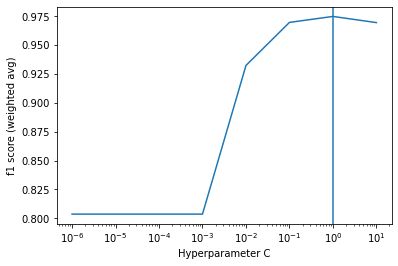

In [94]:
plt.plot(list(f1.keys()),list(f1.values()),'-')
plt.xlabel('Hyperparameter C')
plt.ylabel('f1 score (weighted avg)')
plt.xscale('log')

plt.axvline(c)

In [88]:
classifier = SVC(kernel='linear',C = c)
vocabulary = Bag_of_words_fit(X_train.values)
X_train_features = bag_of_words_transform(X_train.values,vocabulary)
X_test_features = bag_of_words_transform(X_test.values,vocabulary)
classifier.fit(X_train_features,y_train)
y_pred = classifier.predict(X_test_features)

In [93]:
f1_score(y_test, y_pred, average='weighted')
print(classification_report(y_test,y_pred))
tn, fp, fn, tp = confusion_matrix(y_test.values, y_pred).ravel()
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1583
        spam       0.95      0.82      0.88       256

    accuracy                           0.97      1839
   macro avg       0.96      0.90      0.93      1839
weighted avg       0.97      0.97      0.97      1839



array([[1571,   12],
       [  47,  209]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


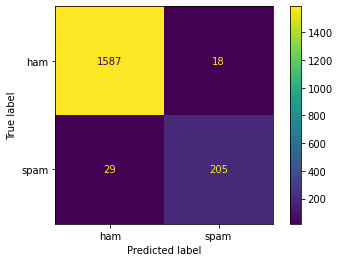

In [21]:
plot_confusion_matrix(classifier, X_test_features, y_test)

In [95]:
print('False positives = ',fp)

False positives =  12


Very less false positives are predicted by the model which is more acceptable for a spam classifier

## Model Classifier




In [ ]:
vocabulary 
#to transform the test data

In [38]:
classifier

SVC(C=1, kernel='linear')

## Testing on sample datasets given in test folder

In [39]:
text_spam = "Dear Beneficiary, The United Nations Compensation Commission (UNCC) has approved to pay you a compensation amount of US$1,500,000 (One Million, Five Hundred Thousand United State Dollars) due to losses and damages suffered as to delayed foreign contract payment of individuals, firms, contractors, inheritance, next-of-kin, super hurricane Sandy and lottery beneficiaries that originated from Africa, Europe, Americas, Asia including the Middle East. Your approved Compensation package has been deposited in the Security Vault of SunWay Finance & Security company USA waiting for delivery. For identification and swift delivery of your compensation package, you are advice to contact Diplomat Ellis Gammon of SunWay Finance & Security company and re-confirm your delivery details: call Tel: +1 321 586 1802, E-mail: ellisgammon8@gmail.com 1. Full Name: 2. Delivery Address: 3. Direct Phone Number: 4. Nearest Airport: 5. Age/Occupation: Congratulations on your payment approval Yours faithfully, Mrs. Jennifer Mcnichols. UNCC Compensation Coordinator."



In [40]:
text_ham ='Dear Sir, PRML quiz was the first exam we have taken among all the other courses here at IIT Madras. We were not really sure about what kind of questions to expect either. I have received a lot of requests from my classmates to request you to increase the number of quizzes to 6 and make it best 4 out of 6. I have raised this issue in the CR meeting and they have told me to ask you. We would be really grateful if you could consider it. Thanks and regards'

In [41]:
email = {'Message':[text_spam,text_ham],'Category':['spam','ham']}


In [42]:
data_test_2 = pd.DataFrame(email)

In [43]:
X_test_2 = data_test_2['Message']
y_test_2 = data_test_2['Category']

In [44]:
X_test_2 = bag_of_words_transform(X_test_2.values,vocabulary)

In [45]:
X_test_2

,able,anything,yesterday,going,home,work,take,care,print,reach,...,ree,grandfather,eta,unemployed,unconsciously,unhappy,process,ratio_unique_words,ratio_stop_words,ratio_non_dict_words
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.740741,3.364058e-41,0.000055
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.752809,1.262467e-04,0.000001


In [46]:
classifier.predict(X_test_2)

array(['spam', 'ham'], dtype=object)

It correctly classifies the 1st mail as spam and 2nd as ham

---



# Extra Analysis for Features 

In [23]:
X_train_features.head()

,able,anything,yesterday,going,home,work,take,care,print,reach,...,ree,grandfather,eta,unemployed,unconsciously,unhappy,process,ratio_unique_words,ratio_stop_words,ratio_non_dict_words
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.209600,0.000000
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.112485,0.000000
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.167460,0.004758
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.040000,0.009600
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.000000


In [24]:
spam_ratio_unique_words = []
ham_ratio_unique_words = []
spam_ratio_stop_words = []
ham_ratio_stop_words = []
spam_ratio_non_dict_words = []
ham_ratio_non_dict_words = []
for i in range(len(X_train)):
  if y_train.values[i]=='spam':
    spam_ratio_unique_words.append(X_train_features['ratio_unique_words'][i])
    spam_ratio_stop_words.append(X_train_features['ratio_stop_words'][i])
    spam_ratio_non_dict_words.append(X_train_features['ratio_non_dict_words'][i])
  if y_train.values[i]=='ham':
    ham_ratio_unique_words.append(X_train_features['ratio_unique_words'][i])
    ham_ratio_stop_words.append(X_train_features['ratio_stop_words'][i])
    ham_ratio_non_dict_words.append(X_train_features['ratio_non_dict_words'][i])


mean of ratio of unique words in spam email =  0.9305263429652948


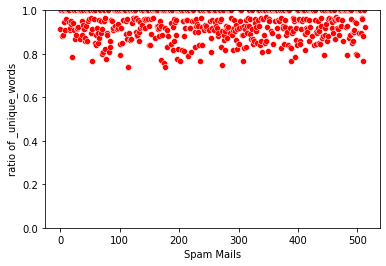

In [31]:
sns.scatterplot(data=spam_ratio_unique_words,color='red')
#sns.kdeplot(data=ham_ratio_unique_words,color='green')
plt.ylabel('ratio of _unique_words')
plt.xlabel('Spam Mails')

plt.ylim(0,1)
print('mean of ratio of unique words in spam email = ' , sum(spam_ratio_unique_words)/len(spam_ratio_unique_words))

mean of ratio of unique words in ham email =  0.9492645874201654


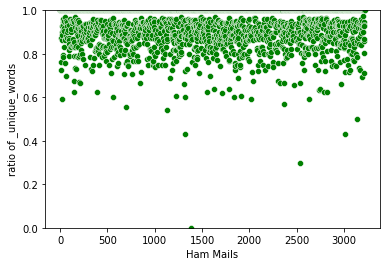

In [32]:
sns.scatterplot(data=ham_ratio_unique_words,color='green')
plt.ylabel('ratio of _unique_words')
plt.xlabel('Ham Mails')

plt.ylim(0,1)
print('mean of ratio of unique words in ham email = ' , sum(ham_ratio_unique_words)/len(ham_ratio_unique_words))

mean of ratio of stop words in spam email =  0.016147029605341704


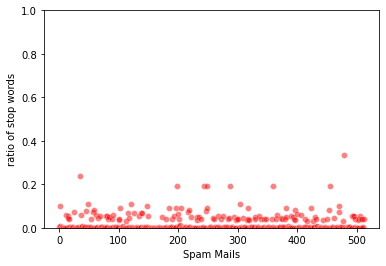

In [33]:
sns.scatterplot(data=spam_ratio_stop_words,color='red',alpha=0.5)
plt.ylabel('ratio of stop words')
plt.xlabel('Spam Mails')
plt.ylim(0,1)
print('mean of ratio of stop words in spam email = ' , sum(spam_ratio_stop_words)/len(spam_ratio_stop_words))
#plt.xlim(0.6,1.0)

mean of ratio of stop words in ham email =  0.04604992657154569


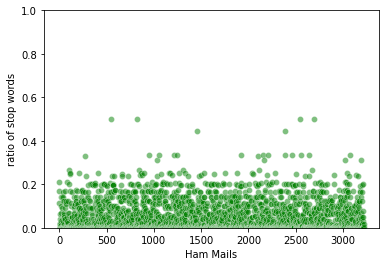

In [35]:
sns.scatterplot(data=ham_ratio_stop_words,color='green',alpha=0.5)
plt.ylim(0,1)
plt.ylabel('ratio of stop words')
plt.xlabel('Ham Mails')
print('mean of ratio of stop words in ham email = ' , sum(ham_ratio_stop_words)/len(ham_ratio_stop_words))

mean of ratio of non-dict words in spam email =  0.017134244527289812


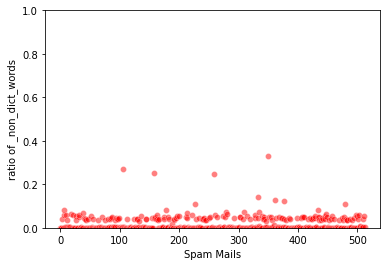

In [36]:
sns.scatterplot(data=spam_ratio_non_dict_words,color='red',alpha=0.5)
plt.ylim(0,1)
plt.ylabel('ratio of _non_dict_words')
plt.xlabel('Spam Mails')
print('mean of ratio of non-dict words in spam email = ' , sum(spam_ratio_non_dict_words)/len(spam_ratio_non_dict_words))

#plt.xlim(0.6,1.0)

mean of ratio of non-dict words in ham email =  0.037347207427926035


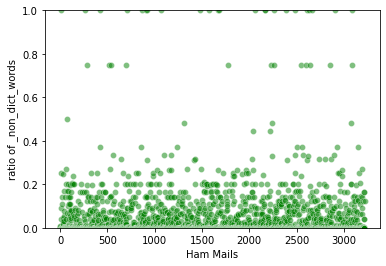

In [37]:
sns.scatterplot(data=ham_ratio_non_dict_words,color='green',alpha=0.5)
plt.ylim(0,1)
plt.ylabel('ratio of _non_dict_words')
plt.xlabel('Ham Mails')
print('mean of ratio of non-dict words in ham email = ' , sum(ham_ratio_non_dict_words)/len(ham_ratio_non_dict_words))


# Read the test datasets

Run these two cells in the directory where test folder is there with txt files

In [65]:
pwd

'/content'

In [70]:
cd test

email1.txt  email2.txt


The txt files given are in rtf files so we use strip rtf function to read the file

In [81]:
import glob
from striprtf.striprtf import rtf_to_text
mails={'Message':[]}
for filename in glob.glob("*.txt"):
    with open(filename) as f:
        try:
            mails['Message'].append(rtf_to_text(f.read()))
            print('read ',filename)
        except:
            continue

read  email1.txt
read  email2.txt


In [82]:
test_mails = pd.DataFrame(mails)
test_mails.head()

,Message
0,"Dear Sir,\n\nPRML quiz was the first exam we h..."
1,"Dear Beneficiary,\n\nThe United Nations Compen..."


Extracting Features

In [83]:
test_mails = pd.DataFrame(mails)
X_test_mails = test_mails['Message']
X_test_mails_features = bag_of_words_transform(X_test_mails.values,vocabulary)
X_test_mails_features.head()


,able,anything,yesterday,going,home,work,take,care,print,reach,...,ree,grandfather,eta,unemployed,unconsciously,unhappy,process,ratio_unique_words,ratio_stop_words,ratio_non_dict_words
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.752809,1.262467e-04,0.000001
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.740741,3.364058e-41,0.000055


Preidicting the labels of the mails

In [84]:
y_pred_test_mails = classifier.predict(X_test_mails_features)
print(y_pred_test_mails)

['ham' 'spam']
